In [79]:
import pandas as pd
import numpy as np

## Create DataFrame

In [80]:
# from 2dmim array:
col1_values = np.arange(1,11)
col2_values = col1_values ** 2; 


In [81]:
df = pd.DataFrame([col1_values, col2_values])
df

,0,1,2,3,4,5,6,7,8,9
0,1,2,3,4,5,6,7,8,9,10
1,1,4,9,16,25,36,49,64,81,100


In [82]:
type(df[0])

pandas.core.series.Series

In [83]:
# from a dictionary of equally shaped arrays
# keys will be the columns names
# array values will be the data.

prices_dict = {
    "fruits": ["apples", "oranges", "bananas", "strawberries"],
    "prices": [1.5, 2, 2.5, 3],
    "suppliers": ["supplier1", "supplier2", "supplier4", "supplier3"],    
}

prices_df = pd.DataFrame(prices_dict, index = [1,2,3,4])
prices_df

,fruits,prices,suppliers
1,apples,1.5,supplier1
2,oranges,2.0,supplier2
3,bananas,2.5,supplier4
4,strawberries,3.0,supplier3


### From CSV

In [84]:
file_path = 'https://raw.githubusercontent.com/geekcourses/JupyterNotebooksExamples/master/datasets/various/drinks.csv'


drinks_df = pd.read_csv(file_path)
drinks_df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


## DataFrame Manipulations

In [85]:
drinks_df.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [86]:
drinks_df.tail(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
183,Tanzania,36,6,1,5.7,AF
184,USA,249,158,84,8.7,NaN
185,Uruguay,115,35,220,6.6,SA
186,Uzbekistan,25,101,8,2.4,AS
187,Vanuatu,21,18,11,0.9,OC
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF
192,Zimbabwe,64,18,4,4.7,AF


In [87]:
drinks_df[['country','continent']].head(3)

,country,continent
0,Afghanistan,AS
1,Albania,EU
2,Algeria,AF


In [88]:
drinks_df.loc[0:5,'beer_servings':'wine_servings']

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45
5,102,128,45


In [89]:
drinks_df.iloc[0:5,1:4]

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45


In [90]:
max_wine = drinks_df.wine_servings.max()
max_beer = drinks_df.beer_servings.max()
max_wine

370

In [91]:
drinks_df.country

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
188      Venezuela
189        Vietnam
190          Yemen
191         Zambia
192       Zimbabwe
Name: country, Length: 193, dtype: object

In [92]:
# find the row which has max_wine for wine_servings
mask = drinks_df.wine_servings == max_wine
drinks_df[mask].country


61    France
Name: country, dtype: object

In [93]:
# get country names which are in continent=='EU'
drinks_df[ drinks_df.continent=='EU' ].country

1                 Albania
3                 Andorra
7                 Armenia
9                 Austria
10             Azerbaijan
15                Belarus
16                Belgium
21     Bosnia-Herzegovina
25               Bulgaria
42                Croatia
44                 Cyprus
45         Czech Republic
48                Denmark
57                Estonia
60                Finland
61                 France
64                Georgia
65                Germany
67                 Greece
75                Hungary
76                Iceland
81                Ireland
83                  Italy
93                 Latvia
98              Lithuania
99             Luxembourg
105                 Malta
111                Monaco
113            Montenegro
120           Netherlands
126                Norway
135                Poland
136              Portugal
139               Moldova
140               Romania
147            San Marino
151                Serbia
155              Slovakia
156         

In [94]:
drinks_df.continent.unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [98]:
# find which country from 'AF' consumes most wine:
af_drinks_df = drinks_df[drinks_df.continent=='AF']
max_wine_in_AF = af_drinks_df.wine_servings.max()

af_drinks_df[af_drinks_df.wine_servings == max_wine_in_AF]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
55,Equatorial Guinea,92,0,233,5.8,AF


## DataFrame and Matplotlib 

In [99]:
wine_servings = drinks_df.wine_servings
wine_servings

0        0
1       54
2       14
3      312
4       45
      ... 
188      3
189      1
190      0
191      4
192      4
Name: wine_servings, Length: 193, dtype: int64

<AxesSubplot:>

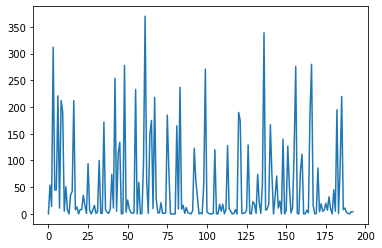

In [100]:
wine_servings.plot()

<AxesSubplot:>

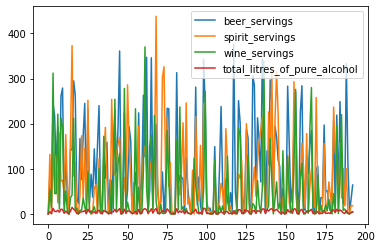

In [101]:
drinks_df.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

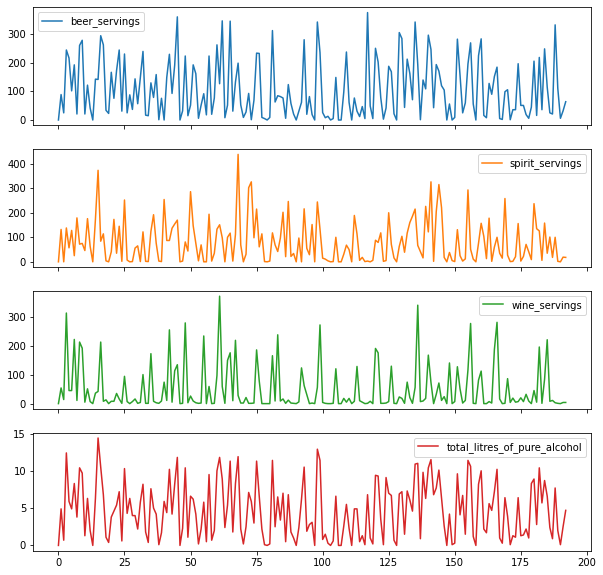

In [104]:
drinks_df.plot(subplots=True, figsize=(10,10))

array([<AxesSubplot:title={'center':'beer_servings'}>,
       <AxesSubplot:title={'center':'spirit_servings'}>,
       <AxesSubplot:title={'center':'wine_servings'}>,
       <AxesSubplot:title={'center':'total_litres_of_pure_alcohol'}>],
      dtype=object)

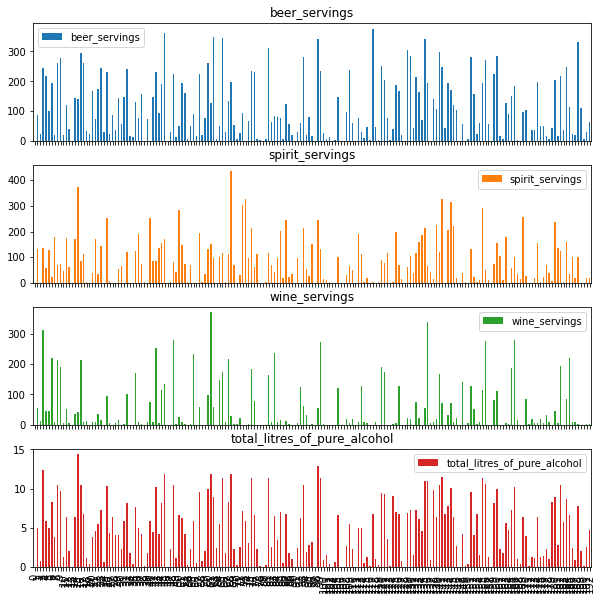

In [106]:
drinks_df.plot(kind='bar' ,subplots=True, figsize=(10,10))

<AxesSubplot:>

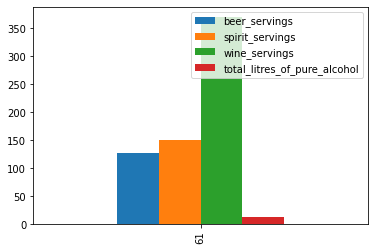

In [114]:
drinks_df[drinks_df.country=='France'].plot(kind='bar', stacked=False)

<AxesSubplot:>

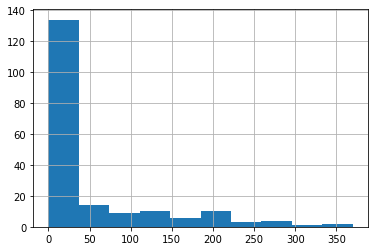

In [117]:
drinks_df.wine_servings.hist()

/media/nemsys/data/projects/courses/netIT/PythonCourseNetIT/.venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:278: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn(


<AxesSubplot:xlabel='wine_servings', ylabel='beer_servings'>

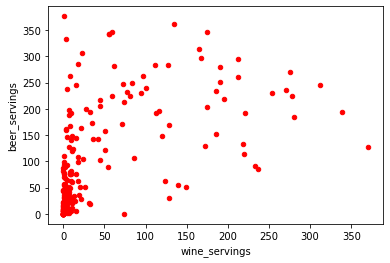

In [128]:
# TODO: fix colormap
drinks_df.plot(kind="scatter",x='wine_servings', y='beer_servings',colormap='viridis', color="red")

<AxesSubplot:xlabel='wine_servings', ylabel='beer_servings'>

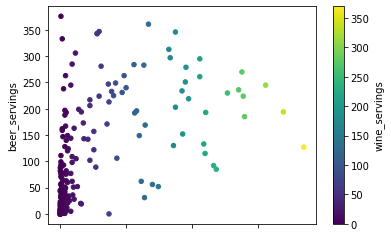

In [131]:
#TODO-DONE:
# За да изполозваме colormap, трябва да имаме зададен аргумент c
drinks_df.plot(kind="scatter",x='wine_servings', y='beer_servings',c = 'wine_servings', colormap='viridis')